# Predict A Doctor's Consultation Fee 

FEATURES:

Qualification: Qualification and degrees held by the doctor

Experience: Experience of the doctor in number of years

Rating: Rating given by patients

Profile: Type of the doctor

Miscellaeous_Info: Extra information about the doctor

Fees: Fees charged by the doctor

Place: Area and the city where the doctor is located.


In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

In [2]:
#loading dataset
df_train=pd.read_excel("Final_Train.xlsx")
df_test=pd.read_excel("Final_Test.xlsx")

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


In [4]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       1987 non-null   object
 1   Experience          1987 non-null   object
 2   Rating              897 non-null    object
 3   Place               1981 non-null   object
 4   Profile             1987 non-null   object
 5   Miscellaneous_Info  1153 non-null   object
dtypes: object(6)
memory usage: 93.3+ KB


In [5]:
#creating column source for further analysis
df_train["source"]="train"
df_test["source"]="test"

In [6]:
#concatinating test and train dataset
df_doc=pd.concat([df_train,df_test])
df_doc

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,source
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100.0,train
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350.0,train
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300.0,train
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250.0,train
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250.0,train
...,...,...,...,...,...,...,...,...
1982,"BAMS, Doctor of Medicine",10 years experience,NaN,"Basavanagudi, Bangalore",Ayurveda,NaN,NaN,test
1983,"MD - Dermatology , Venereology & Leprosy, MBBS",4 years experience,NaN,"Choolai, Chennai",Dermatologists,NaN,NaN,test
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",9 years experience,NaN,"Porur, Chennai",General Medicine,NaN,NaN,test
1985,BDS,12 years experience,98%,"Arekere, Bangalore",Dentist,RCT - Root Canal Treatment Root Canal Treatmen...,NaN,test


In [7]:
#lets reset the index
df_doc.reset_index(drop=True,inplace=True)
df_doc

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,source
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100.0,train
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350.0,train
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300.0,train
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250.0,train
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250.0,train
...,...,...,...,...,...,...,...,...
7943,"BAMS, Doctor of Medicine",10 years experience,NaN,"Basavanagudi, Bangalore",Ayurveda,NaN,NaN,test
7944,"MD - Dermatology , Venereology & Leprosy, MBBS",4 years experience,NaN,"Choolai, Chennai",Dermatologists,NaN,NaN,test
7945,"MBBS, MD / MS - Obstetrics & Gynaecology",9 years experience,NaN,"Porur, Chennai",General Medicine,NaN,NaN,test
7946,BDS,12 years experience,98%,"Arekere, Bangalore",Dentist,RCT - Root Canal Treatment Root Canal Treatmen...,NaN,test


In [8]:
df_doc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7948 entries, 0 to 7947
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Qualification       7948 non-null   object 
 1   Experience          7948 non-null   object 
 2   Rating              3556 non-null   object 
 3   Place               7917 non-null   object 
 4   Profile             7948 non-null   object 
 5   Miscellaneous_Info  4494 non-null   object 
 6   Fees                5961 non-null   float64
 7   source              7948 non-null   object 
dtypes: float64(1), object(7)
memory usage: 496.9+ KB


In [9]:
#lets chcek the null values
df_doc.isnull().sum()

Qualification            0
Experience               0
Rating                4392
Place                   31
Profile                  0
Miscellaneous_Info    3454
Fees                  1987
source                   0
dtype: int64

In [10]:
#Lets chcek the value counts of object type columns
for col in df_doc.columns:
    if df_doc[col].dtype=="object":
        print(df_doc[col].value_counts())
        print()

BDS                                                                                                                                 632
BHMS                                                                                                                                627
BAMS                                                                                                                                624
MBBS                                                                                                                                441
MBBS, MS - ENT                                                                                                                      280
                                                                                                                                   ... 
BDS, PhD - Orthodontics & Dentofacial Orthopaedics, Fellowship and Diplomate in Implantology from ICOI (USA)                          1
MBBS, MD - Dermatology , Venereology & Leprosy, 

In [11]:
#Miscellaneous_Info is a special information unique to the doctor,so its impossible to impute it
#So we will drop replace null values as missing
#df_doc.drop(columns=["Miscellaneous_Info"],inplace=True)
df_doc["Miscellaneous_Info"].fillna("missing",inplace=True)

In [12]:
#We can convert experience column to datatype int
#At fisrt we need to strip of " years experience"
df_doc["Experience"]=df_doc["Experience"].str.strip(" years experience")

In [13]:
#lets see the Experice column
df_doc["Experience"]

0       24
1       12
2        9
3       12
4       20
        ..
7943    10
7944     4
7945     9
7946    12
7947     8
Name: Experience, Length: 7948, dtype: object

In [14]:
#Now we need to convert the Experience column to int
df_doc["Experience"]=df_doc["Experience"].astype(int)

In [15]:
#lets chcek the datatype of the columns in datasets
df_doc.dtypes

Qualification          object
Experience              int32
Rating                 object
Place                  object
Profile                object
Miscellaneous_Info     object
Fees                  float64
source                 object
dtype: object

In [16]:
#Rating grouped by profile
df_doc.groupby(["Profile"]).agg({"Rating":lambda x: x.value_counts().index[0]})

,Rating
Profile,
Ayurveda,100%
Dentist,100%
Dermatologists,100%
ENT Specialist,100%
General Medicine,100%
Homeopath,100%


In [17]:
#Lets strip the"%" of Rating
df_doc["Rating"]=df_doc["Rating"].str.strip("%")

In [18]:
#Converting Rating to float 
df_doc["Rating"]=df_doc["Rating"].astype(float)

In [19]:
df_doc["Rating"]

0       100.0
1        98.0
2         NaN
3         NaN
4       100.0
        ...  
7943      NaN
7944      NaN
7945      NaN
7946     98.0
7947      NaN
Name: Rating, Length: 7948, dtype: float64

In [20]:
#Lets chcek the rows where null values are there
df_doc.loc[df_doc["Rating"].isnull()]
#Here we see in most of "Rating" is nan where miscellaneous_info is missing

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,source
2,"MBBS, MS - Otorhinolaryngology",9,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,missing,300.0,train
3,"BSc - Zoology, BAMS",12,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250.0,train
5,BAMS,8,NaN,"Porur, Chennai",Ayurveda,missing,100.0,train
6,BHMS,42,NaN,"Karol Bagh, Delhi",Homeopath,missing,200.0,train
8,"MBBS, MD - General Medicine",14,NaN,"Old City, Hyderabad",General Medicine,missing,100.0,train
...,...,...,...,...,...,...,...,...
7942,"MBBS, MD - Dermatology , Venereology & Leprosy...",8,NaN,"Lajpat Nagar III, Delhi",Dermatologists,missing,NaN,test
7943,"BAMS, Doctor of Medicine",10,NaN,"Basavanagudi, Bangalore",Ayurveda,missing,NaN,test
7944,"MD - Dermatology , Venereology & Leprosy, MBBS",4,NaN,"Choolai, Chennai",Dermatologists,missing,NaN,test
7945,"MBBS, MD / MS - Obstetrics & Gynaecology",9,NaN,"Porur, Chennai",General Medicine,missing,NaN,test


In [21]:
#Lets replace the null values in rating with 0
df_doc["Rating"].fillna(0,inplace=True)

In [22]:
#chceking null values again
df_doc.isnull().sum()
#Fees what ever null count  is there is what needs to predicted and is part of test dataset
#So we are left with "Place" column which needs to be imputed

Qualification            0
Experience               0
Rating                   0
Place                   31
Profile                  0
Miscellaneous_Info       0
Fees                  1987
source                   0
dtype: int64

In [23]:
#Lets chcek the value counts
df_doc["Place"].value_counts()

HSR Layout, Bangalore       97
Andheri West, Mumbai        97
Dwarka, Delhi               93
Banjara Hills, Hyderabad    85
Mulund West, Mumbai         81
                            ..
Padi, Chennai                1
Nampally, Hyderabad          1
Bhogal, Delhi                1
Sriniwaspuri, Delhi          1
J.C Nagar, Bangalore         1
Name: Place, Length: 948, dtype: int64

In [24]:
#This will have 5 places where maximum number of doctors sit
top_doc_places=df_doc["Place"].value_counts().index[0:5]

In [25]:
null_condition=df_doc[["Place"]].isnull()
null_condition

,Place
0,False
1,False
2,False
3,False
4,False
...,...
7943,False
7944,False
7945,False
7946,False


In [26]:
#We  will impute the null values with fisrt top 5 popular places where doctor sit
null_condition=df_doc[["Place"]].isnull()
count=0
for index_null in null_condition.index:
    if null_condition.loc[index_null][0]==True:
        if count%5==0:
            df_doc.loc[index_null,["Place"]]=top_doc_places[0]
        if count%5==1:
            df_doc.loc[index_null,["Place"]]=top_doc_places[1]
        if count%5==2:
            df_doc.loc[index_null,["Place"]]=top_doc_places[2]
        if count%5==3:
            df_doc.loc[index_null,["Place"]]=top_doc_places[3]
        if count%5==4:
            df_doc.loc[index_null,["Place"]]=top_doc_places[4]
        count=count+1

In [27]:
#Lets again chcek null values
df_doc.isnull().sum()

Qualification            0
Experience               0
Rating                   0
Place                    0
Profile                  0
Miscellaneous_Info       0
Fees                  1987
source                   0
dtype: int64

In [28]:
#value counts for place
df_doc["Place"].value_counts()
#There fore we have evenly imputed the null values with top 5 places

HSR Layout, Bangalore       104
Andheri West, Mumbai        103
Dwarka, Delhi                99
Banjara Hills, Hyderabad     91
Mulund West, Mumbai          87
                           ... 
Padi, Chennai                 1
Nampally, Hyderabad           1
Bhogal, Delhi                 1
Sriniwaspuri, Delhi           1
J.C Nagar, Bangalore          1
Name: Place, Length: 948, dtype: int64

In [29]:
#Now we will divide the Place column into multiple columns
#First we will find maximum Length 
max_address_length=-1
for i in range(len(df_doc["Place"])):
    temp=len(df_doc["Place"].iloc[i].strip().upper().split(","))
    if temp>max_address_length:
        max_address_length=temp
print("Max address length is :{}".format(max_address_length))

Max address length is :3


In [30]:
p1=list()
p2=list()
p3=list()
for i in range(len(df_doc["Place"])):
    temp=df_doc["Place"].iloc[i].split(",")
    try :
        p1.append(temp[0].strip().upper())
    except :
        p1.append('NONE')
    try :
        p2.append(temp[1].strip().upper())
    except :
        p2.append('NONE')
    try :
        p3.append(temp[2].strip().upper())
    except :
        p3.append('NONE')

In [31]:
df_doc["p1"]=p1
df_doc["p2"]=p2
df_doc["p3"]=p3

In [32]:
df_doc.loc[df_doc["p3"]!="NONE"]
#we see only one row is there where p3 contains anything leaving "NONE"

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,source,p1,p2,p3
2169,BDS,11,0.0,"Dwarka, Sector 5, Delhi",Dentist,missing,250.0,train,DWARKA,SECTOR 5,DELHI


In [33]:
#lets change replace p2 by "DELHI" and then drop the entire p3 column
df_doc.loc[df_doc["p3"]!="NONE", ['p2']] = df_doc[['p3']]

In [34]:
df_doc["p2"].fillna("DELHI",inplace=True)

In [35]:
df_doc.loc[df_doc["p3"]!="NONE"]
#Now we see p2 contains "DELHI" so we can drop p3 as it is having no variance

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,source,p1,p2,p3
2169,BDS,11,0.0,"Dwarka, Sector 5, Delhi",Dentist,missing,250.0,train,DWARKA,DELHI,DELHI


In [36]:
#As discussed above lets drop "p3" and "Place"
df_doc.drop(columns=["p3","Place"],inplace=True)

In [37]:
#Lets divide "Qualification" column also into multiple columns
#so we will do similar activity what we did for "Place"
#First we will find maximum Length 
max_qual_length=-1
for i in range(len(df_doc["Qualification"])):
    temp=len(df_doc["Qualification"].iloc[i].strip().upper().split(","))
    if temp>max_qual_length:
        max_qual_length=temp
print("Max qualification length is :{}".format(max_qual_length))

Max qualification length is :17


In [38]:
q1=list()
q2=list()
q3=list()
q4=list()
q5=list()
q6=list()
q7=list()
q8=list()
q9=list()
q10=list()
q11=list()
q12=list()
q13=list()
q14=list()
q15=list()
q16=list()
q17=list()
for i in range(len(df_doc["Qualification"])):
    temp=df_doc["Qualification"].iloc[i].split(",")
    try :
        q1.append(temp[0].strip().upper())
    except :
        q1.append('NONE')
    try :
        q2.append(temp[1].strip().upper())
    except :
        q2.append('NONE')
    try :
        q3.append(temp[2].strip().upper())
    except :
        q3.append('NONE')
    try :
        q4.append(temp[3].strip().upper())
    except :
        q4.append('NONE')
    try :
        q5.append(temp[4].strip().upper())
    except :
        q5.append('NONE')
    try :
        q6.append(temp[5].strip().upper())
    except :
        q6.append('NONE')
    try :
        q7.append(temp[6].strip().upper())
    except :
        q7.append('NONE')
    try :
        q8.append(temp[7].strip().upper())
    except :
        q8.append('NONE')
    try :
        q9.append(temp[8].strip().upper())
    except :
        q9.append('NONE')
    try :
        q10.append(temp[9].strip().upper())
    except :
        q10.append('NONE')
    try :
        q11.append(temp[10].strip().upper())
    except :
        q11.append('NONE')
    try :
        q12.append(temp[11].strip().upper())
    except :
        q12.append('NONE')
    try :
        q13.append(temp[12].strip().upper())
    except :
        q13.append('NONE')
    try :
        q14.append(temp[13].strip().upper())
    except :
        q14.append('NONE')
    try :
        q15.append(temp[14].strip().upper())
    except :
        q15.append('NONE')
    try :
        q16.append(temp[15].strip().upper())
    except :
        q16.append('NONE')
    try :
        q17.append(temp[16].strip().upper())
    except :
        q17.append('NONE')

In [39]:
df_doc["q1"]=q1
df_doc["q2"]=q2
df_doc["q3"]=q3
df_doc["q4"]=q4
df_doc["q5"]=q5
df_doc["q6"]=q6
df_doc["q7"]=q7
df_doc["q8"]=q8
df_doc["q9"]=q9
df_doc["q10"]=q10
df_doc["q11"]=q11
df_doc["q12"]=q12
df_doc["q13"]=q13
df_doc["q14"]=q14
df_doc["q15"]=q15
df_doc["q16"]=q16
df_doc["q17"]=q17

In [40]:
df_doc.loc[(df_doc["q8"]!="NONE")|(df_doc["q9"]!="NONE")|(df_doc["q10"]!="NONE")|(df_doc["q11"]!="NONE")|(df_doc["q12"]!="NONE")|(df_doc["q13"]!="NONE")|(df_doc["q14"]!="NONE")|(df_doc["q15"]!="NONE")|(df_doc["q16"]!="NONE")|(df_doc["q17"]!="NONE")]
#There are only 8  rows with where either of q8 to 17 is not "NONE",so basically q8 to q17 we can simply drop

,Qualification,Experience,Rating,Profile,Miscellaneous_Info,Fees,source,p1,p2,q1,...,q8,q9,q10,q11,q12,q13,q14,q15,q16,q17
1593,"Diploma in Diet and Nutrition, BHMS, Diploma i...",10,99.0,Homeopath,Dermabrasion Laser Resurfacing Acne / Pimples ...,500.0,train,GHATKOPAR EAST,MUMBAI,DIPLOMA IN DIET AND NUTRITION,...,FILLERS,THREADLIFTS,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE
2035,"Fellowship in Oral implantlogy, Certified Adva...",22,97.0,Dentist,RCT - Root Canal Treatment Cosmetic/ Aesthetic...,300.0,train,ASHOK NAGAR,CHENNAI,FELLOWSHIP IN ORAL IMPLANTLOGY,...,FELLOWSHIP IN ADVANCED ENDOSCOPIC SINUS SURGERY,DEGREE IN DENTAL IMPLANT,FELLOWSHIP IN LASERS & COSMETOLOGY,NONE,NONE,NONE,NONE,NONE,NONE,NONE
3562,"MBBS, Diploma in Family Medicine (DFM), Certif...",5,0.0,General Medicine,missing,700.0,train,COIMBATORE RACECOURSE,COIMBATORE,MBBS,...,CCMTD,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE
3580,"MBBS, MD - General Medicine, Post Graduate Dip...",17,88.0,General Medicine,Non-Invasive Cardiology Chest Pain Treatment C...,100.0,train,GREATER KAILASH PART 1,DELHI,MBBS,...,POST GRADUATE CERTIFICATE IN SPORTS MEDICINE,CLINICAL CARDIOLOGY CERTIFICATION,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE
4174,"MBBS, DNB - General Medicine, FRCP, Post Gradu...",29,76.0,General Medicine,"76% 8 Feedback Old Rajendra Nagar, Delhi",100.0,train,OLD RAJENDRA NAGAR,DELHI,MBBS,...,EULAR CERTIFICATE FOR RHEUMATIC DISEASES,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE
5667,"MD - CCM, MD - Physician, Post Graduate Diplom...",13,0.0,General Medicine,missing,300.0,train,PUNJAGUTTA,HYDERABAD,MD - CCM,...,POST GRADUATE DIPLOMA IN DIABETOLOGY (PGDD),MD - CARDIOLOGY,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE
7248,"BDS, PG Diploma in Conservative, Endodontics a...",4,100.0,Dentist,Dental Crowns Dental Fillings Dental Implant F...,NaN,test,NEW ASHOK NAGAR,DELHI,BDS,...,FELLOW OF ACADEMY OF GENERAL EDUCATION (FAGE),ADVANCED RETREATMENT COURSE IN RCT,ADVANCED ENDOTONTIC COURSE ON ROOT CANAL,CERTIFIED COURSE IN ORAL SURGERY,MIDA,CERTIFICATION IN PROSTHODONTICS & PERIODONTOLOGY,CERTIFIED ADVANCED COURSE IN WISDOM TOOTH EXTR...,CERTIFICATE IN COSMETIC DENTISTRY,FELLOWSHIP IN AESTHETIC DENTISTRY (FAD),POST GRADUATE CERTIFICATE IN ENDODONTICS (PGCE)
7249,"FAMS - Fellowship of the Academy Medicine, MBB...",28,60.0,ENT Specialist,"60% 1 Feedback AS Rao Nagar, Hyderabad",NaN,test,AS RAO NAGAR,HYDERABAD,FAMS - FELLOWSHIP OF THE ACADEMY MEDICINE,...,COCHLEAR IMPLANT SURGERY,ADVANCE COURSE ON DIAGNOSIS OF ALLERGY AND IMM...,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE


In [41]:
#dropping q8 to q17 as it is importnat only for 8 rows as discussed sbove
df_doc.drop(columns=["q8","q9","q10","q11","q12","q13","q14","q15","q16","q17"],inplace=True)

In [42]:
#Lets drop "Qualification" column
df_doc.drop(columns=["Qualification"],inplace=True)

In [43]:
df_doc["Miscellaneous_Info"].value_counts()

missing                                                               3454
Acrylic Partial Denture Crowns and Bridges Fixing Artificial Teeth      50
Skin Allergy Treatment Skin Allergies Dermabrasion                      18
Tooth Extraction Dental Fillings Scaling / Polishing                    16
Dental Fillings Zirconia Crowns Dental Implant Fixing                   15
                                                                      ... 
98% 5 Feedback Egmore, Chennai                                           1
96% 2 Feedback Tripunithura, Ernakulam                                   1
91% 17 Feedback Mumbai Central, Mumbai                                   1
67% 8 Feedback CR Park, Delhi                                            1
99% 16 Feedback Banashankari 2nd Stage, Bangalore                        1
Name: Miscellaneous_Info, Length: 3981, dtype: int64

In [46]:
#Now lets process the description column so that we can use it in K means
#Below function we will use to clean the Description column
import re
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords
stop_words=list(stopwords.words('english'))
lemmatizer = WordNetLemmatizer() #Initialising the lemmatizer
def clean(text):
    newstring=""
    text=re.sub("[\W*]"," ",text)
    text=re.sub("\d+[a-z]*"," ",text)
    text=re.sub("\s+"," ",text)
    count=0
    for word in text.split():
        if word not in stop_words:
            word=lemmatizer.lemmatize(word)
            if count==0:
                newstring=newstring+word
            if count!=0:
                newstring=newstring+" "+word
            count=count+1
    return newstring

In [49]:
df_doc["Miscellaneous_Info"]=df_doc["Miscellaneous_Info"].apply(lambda x: clean(x))

In [50]:
#Lets use tf-idf to convert Description into integers
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=1000)
miss_info = vectorizer.fit_transform(df_doc["Miscellaneous_Info"].to_list())
miss_info.shape

(7948, 1000)

In [51]:
df_doc_final=pd.concat([df_doc,pd.DataFrame(miss_info.toarray())],axis=1)

In [52]:
#lets drop the "Miscellaneous_Info" column
df_doc.drop(columns=["Miscellaneous_Info"],inplace=True)

In [53]:
#Lets do some grpahical analysis

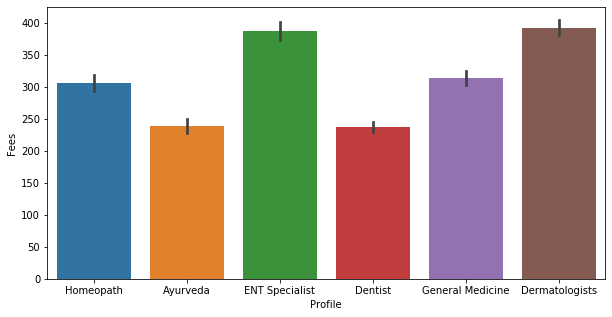

In [54]:
plt.figure(figsize=(10,5))
sns.barplot(x="Profile",y="Fees",data=df_doc_final)
plt.show()
#Here it is clear that ENT specialist and Dermatologists charge more

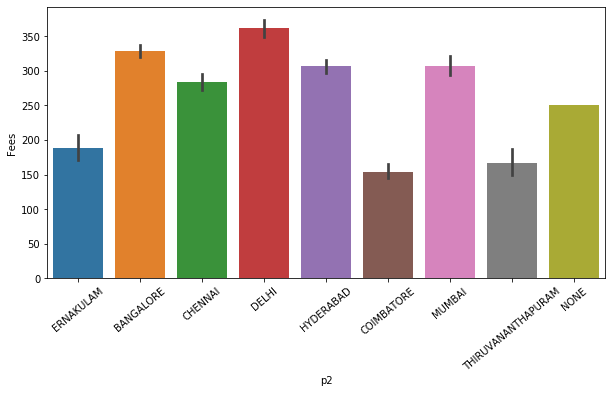

In [55]:
#lets check the averge rate of doctors in a city
plt.figure(figsize=(10,5))
sns.barplot(x="p2",y="Fees",data=df_doc_final)
plt.xticks(rotation=40)
plt.show()
#In delhi averge fees is maximum compared to other cities

In [56]:
df_doc_final.columns

Index([        'Experience',             'Rating',            'Profile',
       'Miscellaneous_Info',               'Fees',             'source',
                       'p1',                 'p2',                 'q1',
                       'q2',
       ...
                        990,                  991,                  992,
                        993,                  994,                  995,
                        996,                  997,                  998,
                        999],
      dtype='object', length=1015)

In [57]:
from sklearn.preprocessing import LabelEncoder
for col in df_doc_final.columns:
    if df_doc_final[col].dtype=="object":
        df_doc_final[col]=LabelEncoder().fit_transform(df_doc_final[col])

In [58]:
df_doc_final

,Experience,Rating,Profile,Miscellaneous_Info,Fees,source,p1,p2,q1,q2,...,990,991,992,993,994,995,996,997,998,999
0,24,100.0,5,968,100.0,1,321,4,8,302,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,12,98.0,0,1300,350.0,1,926,0,5,292,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,9,0.0,3,2362,300.0,1,492,0,102,396,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,12,0.0,0,178,250.0,1,70,0,14,10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,20,100.0,0,993,250.0,1,364,1,5,411,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7943,10,0.0,0,2362,NaN,0,72,0,5,172,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7944,4,0.0,2,2362,NaN,0,133,1,111,493,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7945,9,0.0,4,2362,NaN,0,659,1,102,332,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7946,12,98.0,1,1965,NaN,0,33,0,6,411,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
#lets seprate test and train data
df_train=df_doc_final.loc[df_doc_final["source"]==1]
df_test=df_doc_final.loc[df_doc_final["source"]==0]

In [60]:
#Resetting the index
df_test.reset_index(drop=True,inplace=True)

In [61]:
#Dropping the source column
df_train.drop(columns=["source"],inplace=True)
df_test.drop(columns=["source"],inplace=True)

C:\Users\pc\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [62]:
#Lets seprate the input and output from train dataset
df_x=df_train.drop(columns=["Fees"])
y=df_train[["Fees"]]

In [63]:
#Lets bring every column to common scale
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

In [66]:
#to find random stat which gives least
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_log_error
from sklearn.model_selection import train_test_split
def maxr2_score(regr,df_x,y):
    min_rmsle_score=100
    for r_state in range(42,52):
        x_train, x_test, y_train, y_test = train_test_split(df_x, y,random_state = r_state,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred = regr.predict(x_test)
        rmsle_scr=np.sqrt(mean_squared_log_error(y_test,y_pred))
        print("RMSLE corresponding to ",r_state," is ",rmsle_scr)
        if rmsle_scr<min_rmsle_score:
            min_rmsle_score=rmsle_scr
            final_r_state=r_state
    print("min RMSLE corresponding to ",final_r_state," is ",min_rmsle_score)
    return final_r_state


In [67]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
lg = lgb.LGBMRegressor(silent=True)
param_dist = {"max_depth": [25,50, 75],
              "learning_rate" : [0.01,0.05,0.1],
              "num_leaves": [300,900,1200],
              "n_estimators": [200]
             }
grid_search = GridSearchCV(lg, n_jobs=-1, param_grid=param_dist, cv = 5, scoring="r2")
grid_search.fit(df_x,y)
grid_search.best_params_

{'learning_rate': 0.01,
 'max_depth': 50,
 'n_estimators': 200,
 'num_leaves': 300}

In [68]:
df_x.columns

Index([        'Experience',             'Rating',            'Profile',
       'Miscellaneous_Info',                 'p1',                 'p2',
                       'q1',                 'q2',                 'q3',
                       'q4',
       ...
                        990,                  991,                  992,
                        993,                  994,                  995,
                        996,                  997,                  998,
                        999],
      dtype='object', length=1013)

In [69]:
#LGBM also give provision to define which all columns should be treated as categorical
#So we will use above provision and see what is the result
import warnings
warnings.filterwarnings("ignore")
params={'learning_rate': 0.01,'max_depth': 25,'n_estimators': 200,'num_leaves': 300,'verbose': -1}
cate_features_name=['Profile', 'Rating', 'p1', 'p2', 'q1', 'q2', 'q3','q4', 'q5', 'q6', "q7"]
max_r_score=0
for r_state in range(42,100):
    x_train, x_test, y_train, y_test = train_test_split(df_x, y,random_state = r_state,test_size=0.20)
    d_train = lgb.Dataset(x_train, label=y_train)
    lgb_model = lgb.train(params, d_train, categorical_feature = cate_features_name)
    y_pred = lgb_model.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    print("r2 score corresponding to ",r_state," is ",r2_scr)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print("max r2 score corresponding to ",final_r_state," is ",max_r_score)

r2 score corresponding to  42  is  0.2640837503389377
r2 score corresponding to  43  is  0.22064125518286293
r2 score corresponding to  44  is  0.28960778143417654
r2 score corresponding to  45  is  0.26007584806844797
r2 score corresponding to  46  is  0.22544010168806705
r2 score corresponding to  47  is  0.2521328523487172
r2 score corresponding to  48  is  0.24973579400470525
r2 score corresponding to  49  is  0.2760759145383156
r2 score corresponding to  50  is  0.24691084092017057
r2 score corresponding to  51  is  0.25533268865759495
r2 score corresponding to  52  is  0.1987441876007192
r2 score corresponding to  53  is  0.23794348904834217
r2 score corresponding to  54  is  0.27252360100363393
r2 score corresponding to  55  is  0.2393329338061747
r2 score corresponding to  56  is  0.2301143525935636
r2 score corresponding to  57  is  0.24824338759076947
r2 score corresponding to  58  is  0.19817229046579354
r2 score corresponding to  59  is  0.26180189257389785
r2 score corresp

In [70]:
# Lets make lgbm as our final model
x_train, x_test, y_train, y_test = train_test_split(df_x, y,random_state = 90,test_size=0.20)
d_train = lgb.Dataset(x_train, label=y_train)
lgb_model = lgb.train(params, d_train, categorical_feature = cate_features_name)
y_pred = lgb_model.predict(x_test)

In [71]:
rmsle_scr=np.sqrt(mean_squared_log_error(y_test,y_pred))
print("RMSLE correspondingis ",rmsle_scr)
print("r2 score is ",r2_score(y_test,y_pred))   

RMSLE correspondingis  0.5819385910371947
r2 score is  0.29368676173443


In [73]:
#Applying model on the test set
doc_fee_pred=lgb_model.predict(df_test,predict_disable_shape_check=True)

In [74]:
#storing predictions as dataFrame
doc_fee_pred=pd.DataFrame(doc_fee_pred,columns=["fees"])

In [75]:
#Storing results as csv
doc_fee_pred.to_csv("doctor_fees_predictions.csv",index=False)

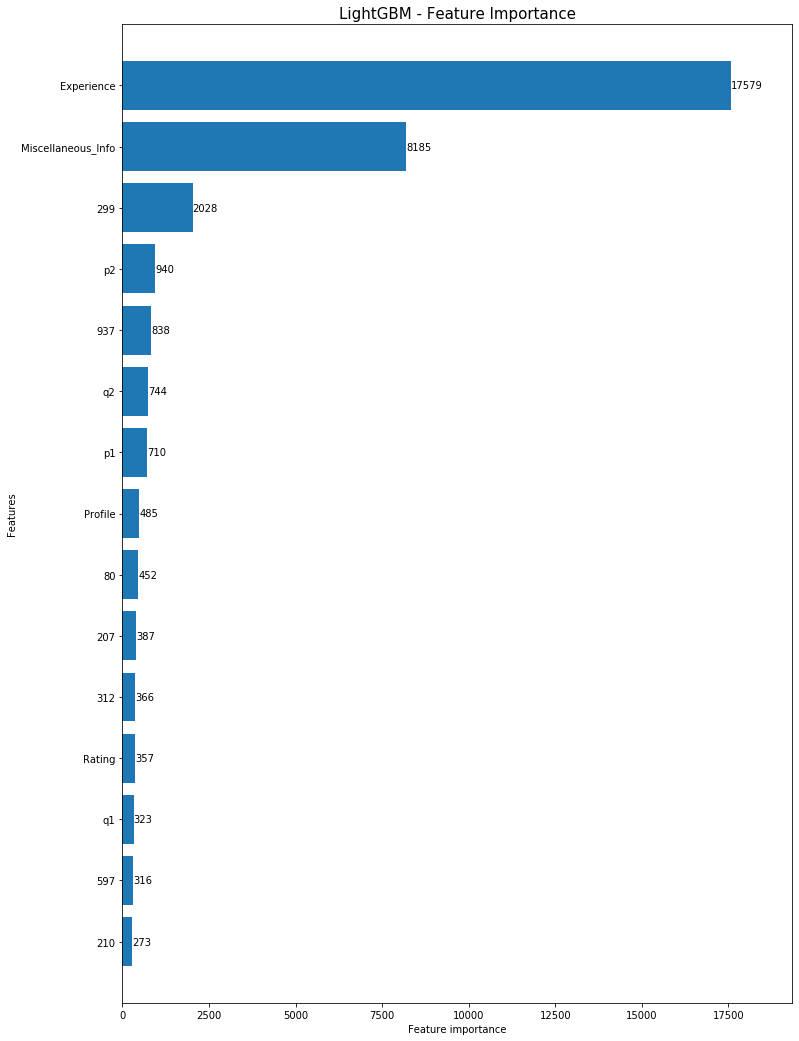

In [77]:
# plot feature importance of LGB

fig, ax = plt.subplots(figsize=(12,18))
lgb.plot_importance(lgb_model, max_num_features=15, height=0.8, ax=ax)
ax.grid(False)
plt.title("LightGBM - Feature Importance", fontsize=15)
plt.show()

In [78]:
# save the model
import pickle
filename = 'doctor_fees_predictions.pkl'
pickle.dump(lgb_model, open(filename, 'wb'))